<a href="https://colab.research.google.com/github/guimasuko/project/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pip install yfinance --upgrade --no-cache-dir
%pip install investpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import investpy as inv

In [4]:
import time
import datetime

## Tarefa 01

### Taxa de juros Brasil (Selic)

Códigos para obtenção de dados do bc:

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [5]:
# função que retorna dados do banco central através de códigos
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [6]:
# código da meta da taxa de juros brasileira (selic)
selic = consulta_bc(432)

In [7]:
selic.rename(columns={'valor': 'Selic'}, inplace=True)
selic.head()

,Selic
data,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0


In [8]:
selic.to_csv('data/selic.csv')

### Dólar e Ibovespa

In [9]:
tickers = "^BVSP USDBRL=X"
dollar_ibov = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [10]:
dollar_ibov.rename(columns={'USDBRL=X': 'Dollar', '^BVSP': 'Ibovespa'}, inplace=True)

In [11]:
dollar_ibov.head()

,Dollar,Ibovespa
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0


In [12]:
dollar_ibov.to_csv('data/dollar_ibov.csv')

### Unindo os dois dataframes.

In [13]:
df = pd.merge(dollar_ibov, selic, left_index=True, right_index=True)
df

,Dollar,Ibovespa,Selic
2007-01-01,2.1325,NaN,13.25
2007-01-02,2.1310,45383.0,13.25
2007-01-03,2.1345,44445.0,13.25
2007-01-04,2.1390,44020.0,13.25
2007-01-05,2.1470,42245.0,13.25
...,...,...,...
2022-02-15,5.2140,114660.0,10.75
2022-02-16,5.1579,115181.0,10.75
2022-02-17,5.1358,113528.0,10.75
2022-02-18,5.1706,112768.0,10.75


In [14]:
df.to_csv('data/dollar_ibov_selic.csv')

## Tarefa 02

In [15]:
import seaborn as sns

<AxesSubplot:title={'center':'Série da Taxa Selic 2007-2022'}, ylabel='Porcentagem'>

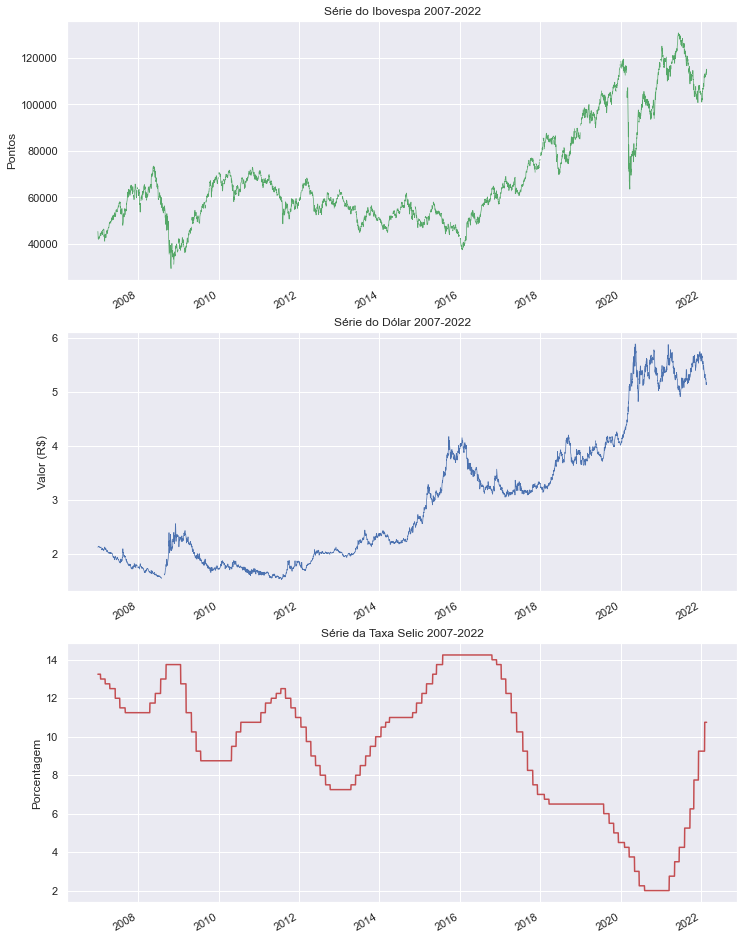

In [16]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df['Ibovespa'].plot(ax=axes[0], ylabel='Pontos', title='Série do Ibovespa 2007-2022', linewidth=.7, color='g')
df['Dollar'].plot(ax=axes[1], ylabel='Valor (R$)', title='Série do Dólar 2007-2022', linewidth=.7, color='b')
df['Selic'].plot(ax=axes[2], ylabel='Porcentagem', title='Série da Taxa Selic 2007-2022', color='r')

In [17]:
df['Dollar'].mean(skipna=True)

2.9506811199061627

In [18]:
df1 = df.groupby(df.index.year).mean()
df1['Dollar'] = round(df1['Dollar'], 2)
df1['Ibovespa'] = round(df1['Ibovespa'],0).astype(int)
df1['Selic'] = round(df1['Selic'], 2)
df1

,Dollar,Ibovespa,Selic
2007,1.95,53114,12.05
2008,1.84,55261,12.45
2009,1.99,52751,10.15
2010,1.75,67258,9.91
2011,1.67,61207,11.76
2012,1.95,59579,8.63
2013,2.15,53670,8.29
2014,2.35,52730,10.96
2015,3.33,49780,13.47
2016,3.48,53258,14.18


<AxesSubplot:title={'center':'Média da Taxa Selic por ano 2007-2022'}, xlabel='Data', ylabel='Porcentagem'>

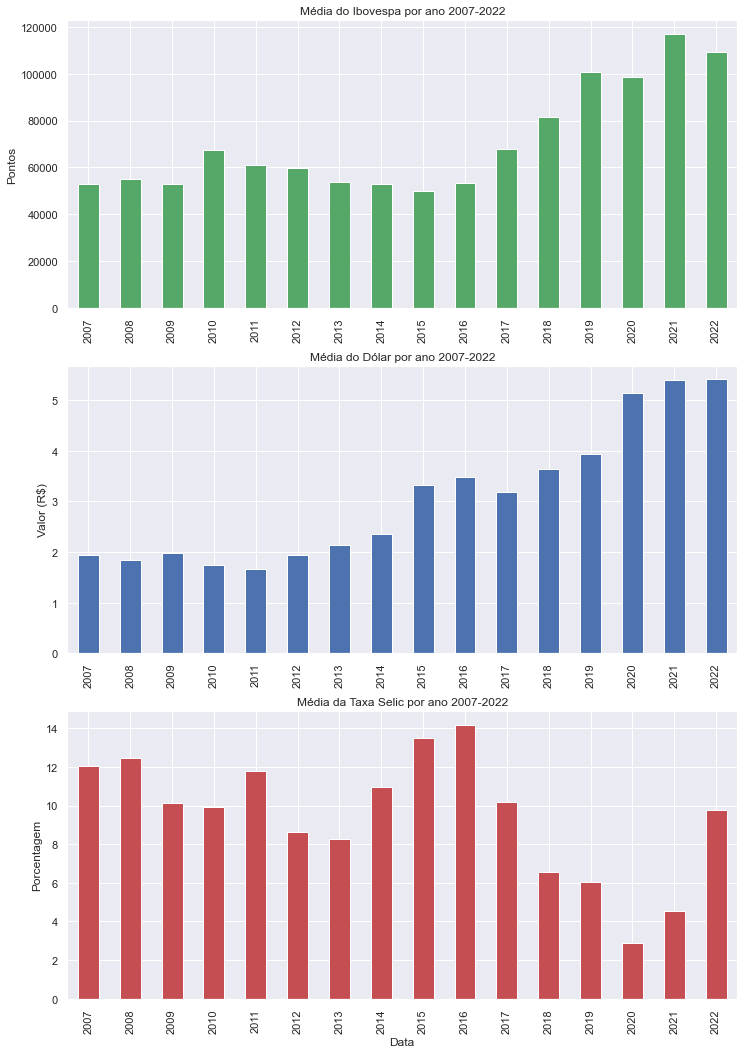

In [19]:
sns.set()
fig, axes = plt.subplots(3,1,figsize=(12,18))

df1['Ibovespa'].plot(ax=axes[0], kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g')
df1['Dollar'].plot(ax=axes[1], kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b')
df1['Selic'].plot(ax=axes[2], kind='bar', xlabel="Data", ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r')

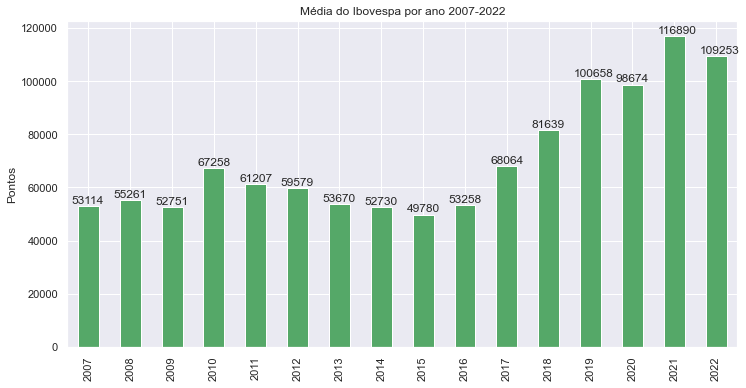

In [20]:
df1['Ibovespa'].plot(kind='bar', ylabel="Pontos", title="Média do Ibovespa por ano 2007-2022", color='g', figsize=(12,6))

y = df1['Ibovespa'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.4, value + 1000, str(value))

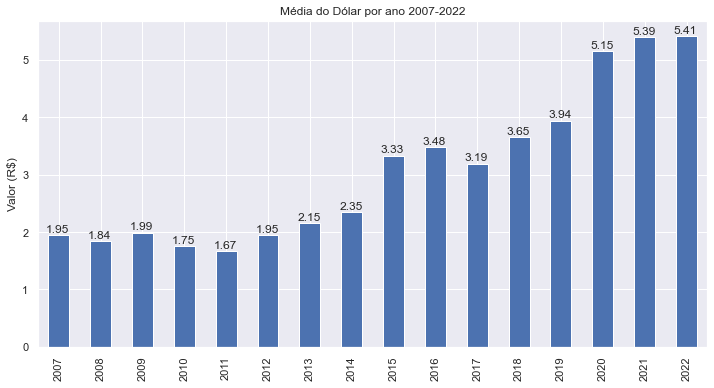

In [21]:
df1['Dollar'].plot(kind='bar', ylabel="Valor (R$)", title="Média do Dólar por ano 2007-2022", color='b', figsize=(12,6))

y = df1['Dollar'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.3, value + 0.05, str(value))

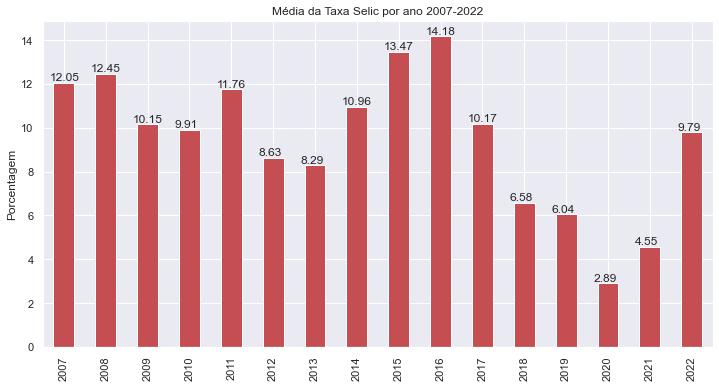

In [22]:
df1['Selic'].plot(kind='bar', ylabel="Porcentagem", title="Média da Taxa Selic por ano 2007-2022", color='r', figsize=(12,6))

y = df1['Selic'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.1, str(value))

## Tarefa 03

### Usando apenas pandas

In [23]:
# função cujo o atributo é o ano de interesse da liga nba
def nba(year):
    str = 'https://www.basketball-reference.com/leagues/NBA_{}_standings.html'
    url = str.format(year)
    return url

In [24]:
# interessse na liga do ano de 2022
url = nba(2022)
nba_2022 = pd.read_html(url, header=0)

In [25]:
# os índices [0] e [1] representam as conferências leste e oeste, respesctivamente
east_conf = nba_2022[0]
west_conf = nba_2022[1]

In [26]:
# renomeia as colunas Western Conference e Eastern Conference para Team
west_conf = west_conf.rename(columns={'Western Conference': 'Team'})
east_conf = east_conf.rename(columns={'Eastern Conference': 'Team'})

In [27]:
# separa a coluna Team em duas, lado esquerdo de "(" que referencia o time e lado direito de ")" que referencia a posição
west_conf[['Team', '# Conf']] = west_conf['Team'].str.split('(', expand=True)
east_conf[['Team', '# Conf']] = east_conf['Team'].str.split('(', expand=True)

In [28]:
# retira o último caracter da coluna # Conf
west_conf['# Conf'] = west_conf['# Conf'].str[:-1]
east_conf['# Conf'] = east_conf['# Conf'].str[:-1]

In [29]:
# adiciona coluna sobre qual conferência o time pertence
west_conf['Conf'] = 'West'
east_conf['Conf'] = 'East'

In [30]:
# unindo os dois dataframes
geral = pd.concat([west_conf, east_conf])

In [31]:
# ordenando os times em ordem decrescente pela razão vitória/derrota
geral.sort_values(by=['W/L%'], ascending=False, inplace=True)

In [32]:
# arredondando para duas casas decimais
geral['W/L%'] = round(geral['W/L%'], 2)

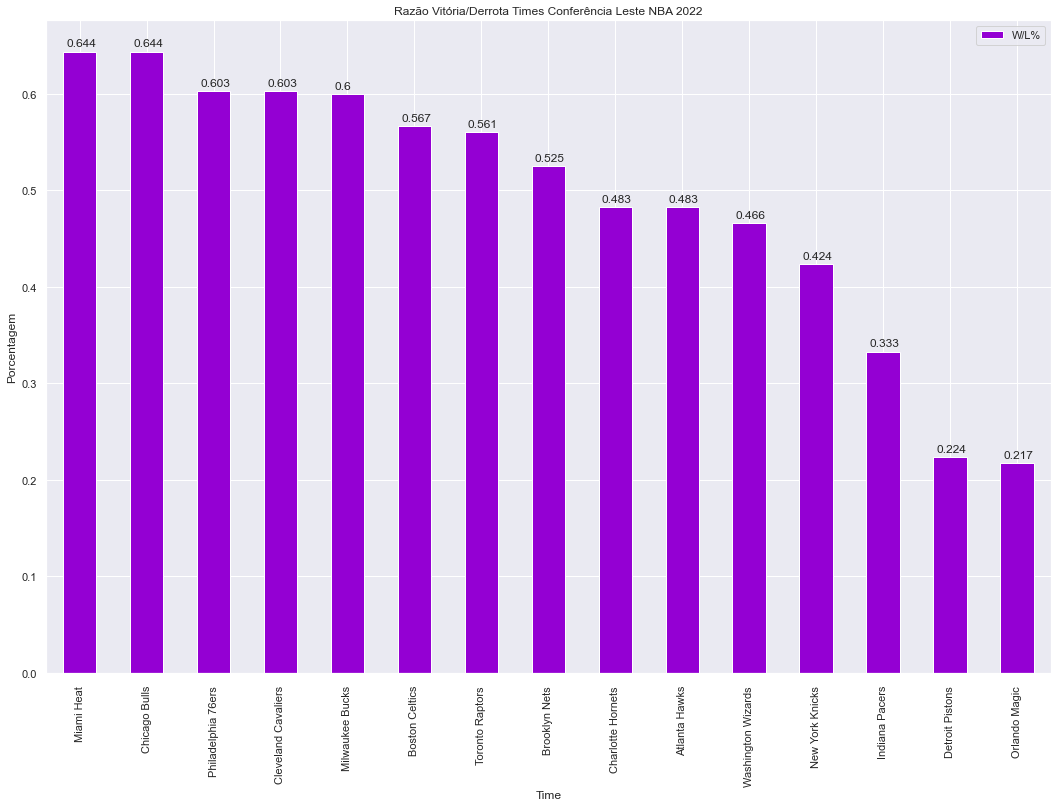

In [33]:
east_conf.plot(
    x = 'Team',
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Proporção", 
    title="Razão Vitória/Derrota Times Conferência Leste NBA 2022", 
    color='darkviolet', 
    figsize=(18,12)
    )

y = east_conf['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.20, value + 0.005, str(value))

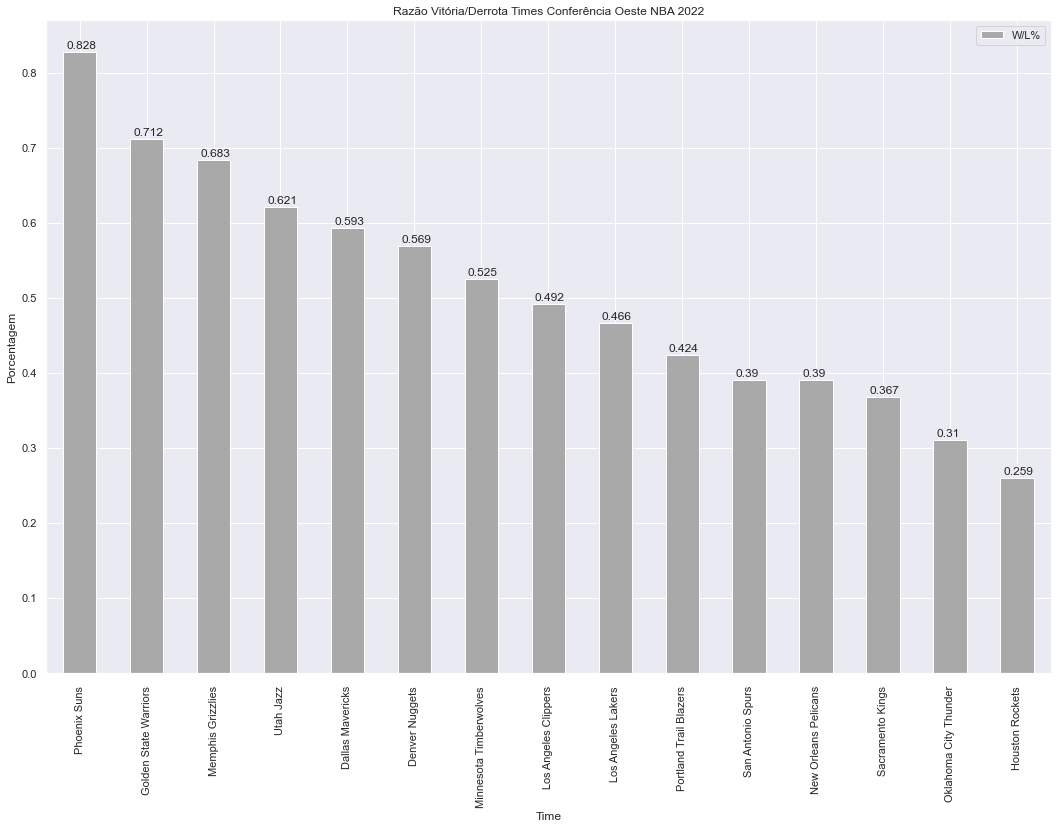

In [34]:
west_conf.plot(
    x = 'Team',
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Proporção", 
    title="Razão Vitória/Derrota Times Conferência Oeste NBA 2022", 
    color='darkgrey', 
    figsize=(18,12)
    )

y = west_conf['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.20, value + 0.005, str(value))

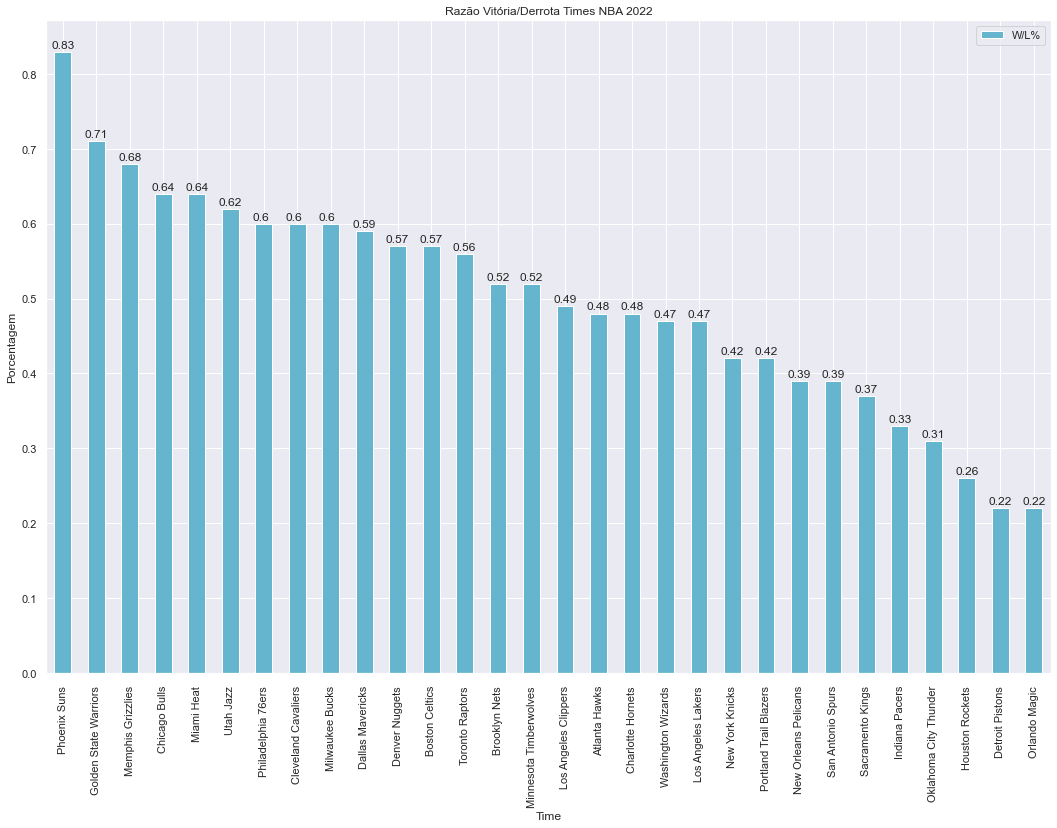

In [35]:
geral.plot(
    x = 'Team', 
    y = 'W/L%', 
    kind='bar', 
    xlabel='Time', 
    ylabel="Proporção", 
    title="Razão Vitória/Derrota Times NBA 2022", 
    color='c', 
    figsize=(18,12)
    )

y = geral['W/L%'].to_list()

for index, value in enumerate(y):
    plt.text(index - 0.35, value + 0.005, str(value))

### Usando BeautifulSoup

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [79]:
# Lendo a página da url
url = 'https://www.worldometers.info/world-population/'
requests.get(url)
page = requests.get(url)

In [80]:
# Transforma a página em texto html
soup = BeautifulSoup(page.text, "html.parser")

In [156]:
# Encontra e traz apenas o texto html referente a tabela de interesse
table_data = soup.find('table', class_="table table-striped table-bordered table-hover table-condensed table-list")

In [157]:
# Pega os nomes das colunas
headers = []
for i in table_data.find_all('th'):
    title = i.text.strip()
    headers.append(title)

In [158]:
# Criando dataframe com as colunas pegas na célula anterior
df = pd.DataFrame(columns = headers)

In [159]:
# Pegando os dados de cada linha
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text.strip() for tr in row_data]
        length = len(df)
        df.loc[length] = row

In [160]:
# retirando as vírgulas das colunas
df['Population'] = df['Population'].str.replace(',','')
df['Urban Population'] = df['Urban Population'].str.replace(',','')

In [161]:
# retirando o símbolo % da coluna Urban Pop %
for i in range(len(df)):
    if df['Urban Pop %'][i] != 'N.A.':
        df['Urban Pop %'][i] = df['Urban Pop %'][i][:-2]
    else:
        pass

In [162]:
# tratando os N.A 
df['Urban Population'] = df['Urban Population'].replace("N.A.", np.nan)
df['Urban Pop %'] = df['Urban Pop %'].replace("N.A.", np.nan)

In [163]:
# transformando as colunas de string para numeric
df['Population'] = pd.to_numeric(df['Population'])
df['Urban Population'] = pd.to_numeric(df['Urban Population'])
df['Year (July 1)'] = pd.to_numeric(df['Year (July 1)'])
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'])

In [164]:
# dataframe pronto
df.rename(columns={'Year (July 1)': 'Year'}, inplace=True)
df

,Year,Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population
0,2020,7794798739,1.05 %,"81,330,639",30.9,2.47,52,56.2,4.378994e+09
1,2019,7713468100,1.08 %,"82,377,060",29.8,2.51,52,55.7,4.299439e+09
2,2018,7631091040,1.10 %,"83,232,115",29.8,2.51,51,55.3,4.219817e+09
3,2017,7547858925,1.12 %,"83,836,876",29.8,2.51,51,54.9,4.140189e+09
4,2016,7464022049,1.14 %,"84,224,910",29.8,2.51,50,54.4,4.060653e+09
5,2015,7379797139,1.19 %,"84,594,707",30,2.52,50,54.0,3.981498e+09
6,2010,6956823603,1.24 %,"82,983,315",28,2.58,47,51.7,3.594868e+09
7,2005,6541907027,1.26 %,"79,682,641",27,2.65,44,49.2,3.215906e+09
8,2000,6143493823,1.35 %,"79,856,169",26,2.78,41,46.7,2.868308e+09
9,1995,5744212979,1.52 %,"83,396,384",25,3.01,39,44.8,2.575505e+09


<AxesSubplot:title={'center':'População por ano'}, xlabel='Ano', ylabel='População (Bilhões)'>

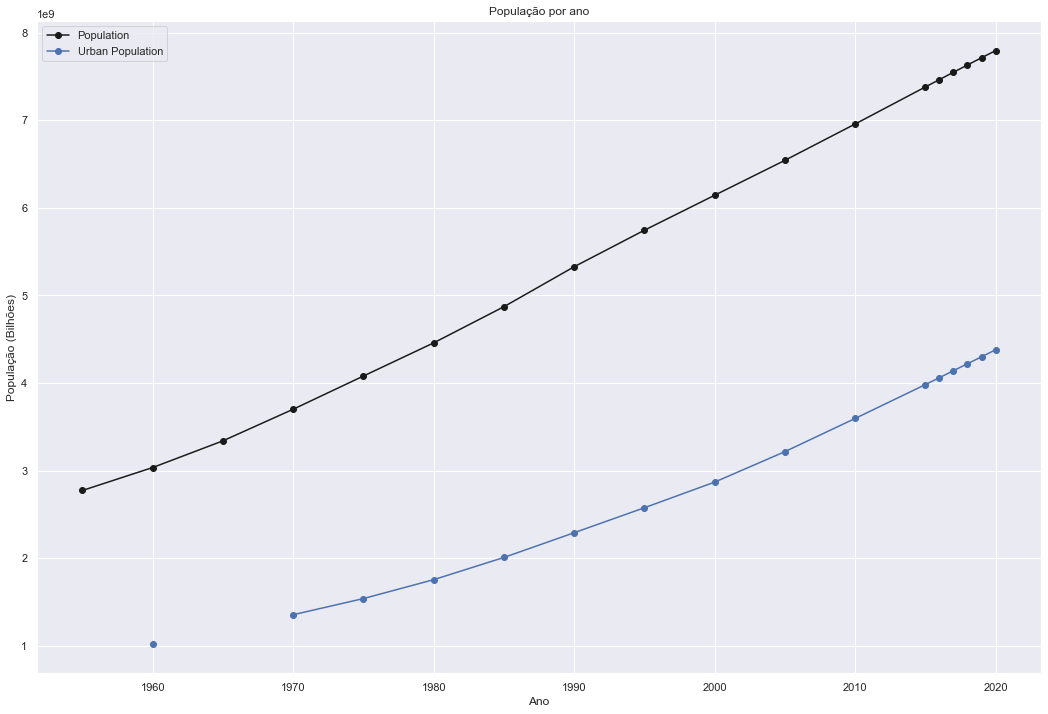

In [177]:
df.plot(
    x='Year',
    y=['Population','Urban Population'],
    kind='line',
    marker='o',
    xlabel='Ano', 
    ylabel="População (Bilhões)", 
    title="População por ano", 
    color=['k','b'], 
    figsize=(18,12)
    )

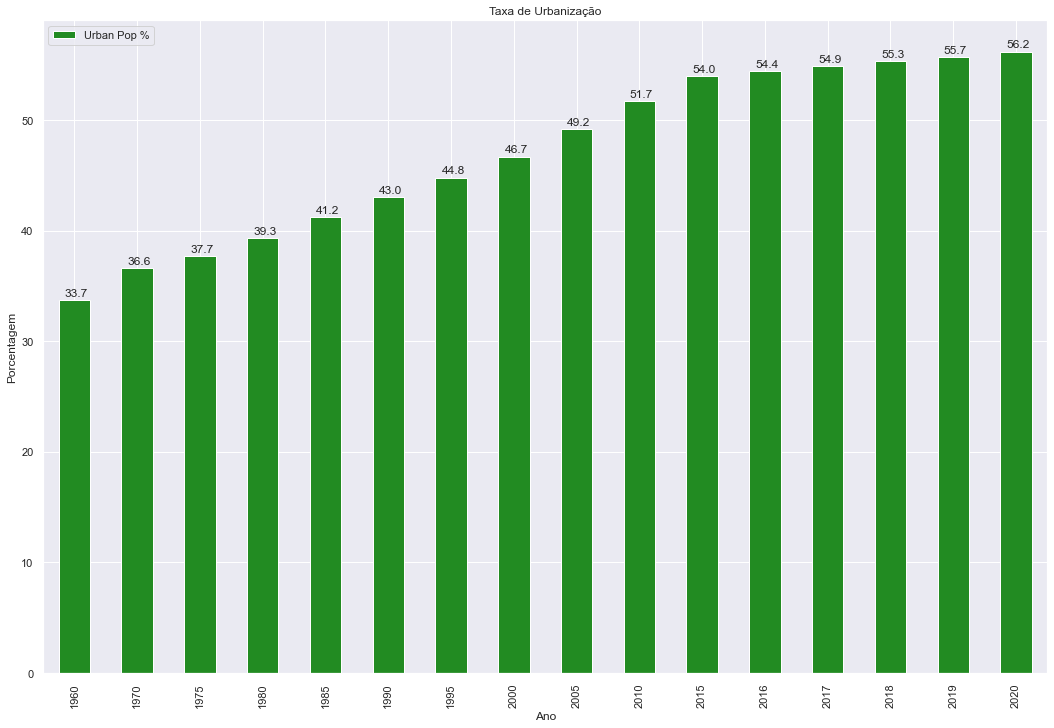

In [209]:
df.dropna(subset=['Urban Pop %']).sort_values(by='Year', ascending=True).plot(
    x='Year',
    y='Urban Pop %',
    kind='bar',
    xlabel='Ano', 
    ylabel="Porcentagem", 
    title="Taxa de Urbanização", 
    color='forestgreen', 
    figsize=(18,12)
    ).legend(loc='upper left')


y = df['Urban Pop %'].dropna().sort_values(ascending=True).to_list()

for index, value in enumerate(y):
    plt.text(index - 0.15, value + 0.35, str(value))